In [1]:
import pandas as pd
import matplotlib
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

income_21 = pd.read_csv('서울시 우리마을가게 상권분석서비스(상권-추정매출)_2021.csv', encoding = 'euc-kr')
income_20 = pd.read_csv('서울시 우리마을가게 상권분석서비스(상권-추정매출)_2020.csv', encoding = 'euc-kr')
income_19 = pd.read_csv('서울시 우리마을가게 상권분석서비스(상권-추정매출)_2019.csv', encoding = 'euc-kr')
where=pd.read_csv('서울시 우리마을가게 상권분석서비스(상권영역).csv', encoding = 'euc-kr')
sp = pd.read_csv('서울시 우리마을가게 상권분석서비스(상권-생활인구).csv', encoding = 'euc-kr')
gu_code=pd.read_csv('행정동코드_매핑정보_2018.csv')


In [4]:
income_21.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96895 entries, 0 to 96894
Data columns (total 80 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   기준_년_코드          96895 non-null  int64 
 1   기준_분기_코드         96895 non-null  int64 
 2   상권_구분_코드         96895 non-null  object
 3   상권_구분_코드_명       96895 non-null  object
 4   상권_코드            96895 non-null  int64 
 5   상권_코드_명          96895 non-null  object
 6   서비스_업종_코드        96895 non-null  object
 7   서비스_업종_코드_명      96895 non-null  object
 8   분기당_매출_금액        96895 non-null  int64 
 9   분기당_매출_건수        96895 non-null  int64 
 10  주중_매출_비율         96895 non-null  int64 
 11  주말_매출_비율         96895 non-null  int64 
 12  월요일_매출_비율        96895 non-null  int64 
 13  화요일_매출_비율        96895 non-null  int64 
 14  수요일_매출_비율        96895 non-null  int64 
 15  목요일_매출_비율        96895 non-null  int64 
 16  금요일_매출_비율        96895 non-null  int64 
 17  토요일_매출_비율        96895 non-null

In [5]:
for i in income_21.keys():
    print(i,'-->',type(income_21[i][0]),income_21[i][0])

기준_년_코드 --> <class 'numpy.int64'> 2021
기준_분기_코드 --> <class 'numpy.int64'> 3
상권_구분_코드 --> <class 'str'> U
상권_구분_코드_명 --> <class 'str'> 관광특구
상권_코드 --> <class 'numpy.int64'> 1001496
상권_코드_명 --> <class 'str'> 강남 마이스 관광특구
서비스_업종_코드 --> <class 'str'> CS300043
서비스_업종_코드_명 --> <class 'str'> 전자상거래업
분기당_매출_금액 --> <class 'numpy.int64'> 1713936
분기당_매출_건수 --> <class 'numpy.int64'> 34
주중_매출_비율 --> <class 'numpy.int64'> 100
주말_매출_비율 --> <class 'numpy.int64'> 0
월요일_매출_비율 --> <class 'numpy.int64'> 0
화요일_매출_비율 --> <class 'numpy.int64'> 0
수요일_매출_비율 --> <class 'numpy.int64'> 11
목요일_매출_비율 --> <class 'numpy.int64'> 89
금요일_매출_비율 --> <class 'numpy.int64'> 0
토요일_매출_비율 --> <class 'numpy.int64'> 0
일요일_매출_비율 --> <class 'numpy.int64'> 0
시간대_00~06_매출_비율 --> <class 'numpy.int64'> 0
시간대_06~11_매출_비율 --> <class 'numpy.int64'> 9
시간대_11~14_매출_비율 --> <class 'numpy.int64'> 7
시간대_14~17_매출_비율 --> <class 'numpy.int64'> 83
시간대_17~21_매출_비율 --> <class 'numpy.int64'> 2
시간대_21~24_매출_비율 --> <class 'numpy.int64'> 0
남성_매출_비율 --> <cla

In [6]:
income_20_4 = income_20[income_20['기준_분기_코드'] == 4]
income_20_4

,기준_년_코드,기준_분기_코드,상권_구분_코드,상권_구분_코드_명,상권_코드,상권_코드_명,서비스_업종_코드,서비스_업종_코드_명,분기당_매출_금액,분기당_매출_건수,...,시간대_건수~24_매출_건수,남성_매출_건수,여성_매출_건수,연령대_10_매출_건수,연령대_20_매출_건수,연령대_30_매출_건수,연령대_40_매출_건수,연령대_50_매출_건수,연령대_60_이상_매출_건수,점포수
33,2020,4,A,골목상권,1000011,숭인동길,CS300004,핸드폰,1.113951e+08,887,...,0,295,592,0,0,0,295,444,148,3
36,2020,4,A,골목상권,1000018,종로58가길,CS200036,고시원,7.000000e+07,176,...,88,0,176,0,0,0,176,0,0,1
37,2020,4,A,골목상권,1000057,백범로79길,CS200001,일반교습학원,1.678478e+08,667,...,4,199,437,0,15,198,319,93,11,6
38,2020,4,A,골목상권,1000060,소월로20길,CS300003,컴퓨터및주변장치판매,6.900270e+05,17,...,0,0,17,0,0,17,0,0,0,1
40,2020,4,A,골목상권,1000074,청파로47나길,CS300011,일반의류,1.041667e+07,84,...,0,84,0,0,0,0,0,84,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132076,2020,4,U,관광특구,1001496,강남 마이스 관광특구,CS300027,섬유제품,9.713897e+08,31185,...,856,5768,25417,1111,15614,6853,3873,3166,568,6
132077,2020,4,U,관광특구,1001496,강남 마이스 관광특구,CS300028,화초,4.096106e+08,9795,...,12,5050,4262,30,2543,3556,1490,930,763,6
132078,2020,4,U,관광특구,1001496,강남 마이스 관광특구,CS300031,가구,1.192001e+10,6667,...,0,2753,3914,0,306,634,1455,1520,2752,6
132079,2020,4,U,관광특구,1001496,강남 마이스 관광특구,CS300032,가전제품,2.123969e+09,8062,...,210,3726,3652,84,2400,2154,1469,850,418,8


In [7]:
yearIncome = pd.merge(income_21, income_20_4, how='outer')
yearIncome

,기준_년_코드,기준_분기_코드,상권_구분_코드,상권_구분_코드_명,상권_코드,상권_코드_명,서비스_업종_코드,서비스_업종_코드_명,분기당_매출_금액,분기당_매출_건수,...,시간대_건수~24_매출_건수,남성_매출_건수,여성_매출_건수,연령대_10_매출_건수,연령대_20_매출_건수,연령대_30_매출_건수,연령대_40_매출_건수,연령대_50_매출_건수,연령대_60_이상_매출_건수,점포수
0,2021,3,U,관광특구,1001496,강남 마이스 관광특구,CS300043,전자상거래업,1.713936e+06,34,...,0,10,24,0,0,19,15,0,0,8
1,2021,3,U,관광특구,1001496,강남 마이스 관광특구,CS300032,가전제품,1.299769e+09,7232,...,30,2604,4223,78,1338,1276,1042,1268,1825,8
2,2021,3,U,관광특구,1001496,강남 마이스 관광특구,CS300031,가구,1.184737e+10,7370,...,0,2908,4462,0,211,655,1921,1913,2670,6
3,2021,3,U,관광특구,1001496,강남 마이스 관광특구,CS300028,화초,3.250969e+08,6758,...,12,3870,2493,36,1473,2148,1547,804,355,6
4,2021,3,U,관광특구,1001496,강남 마이스 관광특구,CS300027,섬유제품,9.009908e+08,17667,...,375,3593,13941,461,8131,3754,2675,2081,431,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129657,2020,4,U,관광특구,1001496,강남 마이스 관광특구,CS300027,섬유제품,9.713897e+08,31185,...,856,5768,25417,1111,15614,6853,3873,3166,568,6
129658,2020,4,U,관광특구,1001496,강남 마이스 관광특구,CS300028,화초,4.096106e+08,9795,...,12,5050,4262,30,2543,3556,1490,930,763,6
129659,2020,4,U,관광특구,1001496,강남 마이스 관광특구,CS300031,가구,1.192001e+10,6667,...,0,2753,3914,0,306,634,1455,1520,2752,6
129660,2020,4,U,관광특구,1001496,강남 마이스 관광특구,CS300032,가전제품,2.123969e+09,8062,...,210,3726,3652,84,2400,2154,1469,850,418,8


In [8]:
where=where.drop(['형태정보'],axis=1)
where

,기준_년월_코드,상권_구분_코드,상권_구분_코드_명,상권_코드,상권_코드_명,엑스좌표_값,와이좌표_값,시군구_코드,행정동_코드
0,201810,A,골목상권,1000275,보문로26길,201886,454183,11290,11290600
1,201810,A,골목상권,1000276,보문로31길,201385,454290,11290,11290555
2,201810,D,발달상권,1001045,동작구 총신대입구역_1,198304,442948,11590,11590630
3,201810,D,발달상권,1001046,서울 관악구 신림역_4,193828,443001,11620,11620695
4,201810,D,발달상권,1001047,뱅뱅사거리_1,202960,443242,11680,11680655
...,...,...,...,...,...,...,...,...,...
1491,201810,D,발달상권,1001153,당산역_1,191112,448327,11560,11560620
1492,201810,D,발달상권,1001154,용산 전자상가_4,196450,448406,11170,11170560
1493,201810,D,발달상권,1001155,용산 전자상가_5,196870,448350,11170,11170560
1494,201810,D,발달상권,1001156,서울 강동구 길동역,212214,448512,11740,11740685


In [9]:
# 시군구 코드로 where  inner join
# 기준이 되는 colum 이름을 동일하게 하여 merge 할 수 있게함

gu_code.rename(columns={'RESD_CD':'시군구_코드','RESC_CT_NM':'시군구_명'},inplace=True)
guwhere=where.merge(gu_code[['시군구_코드','시군구_명']], how='inner', on =['시군구_코드'])
guwhere

,기준_년월_코드,상권_구분_코드,상권_구분_코드_명,상권_코드,상권_코드_명,엑스좌표_값,와이좌표_값,시군구_코드,행정동_코드,시군구_명
0,201810,A,골목상권,1000275,보문로26길,201886,454183,11290,11290600,성북구
1,201810,A,골목상권,1000276,보문로31길,201385,454290,11290,11290555,성북구
2,201810,R,전통시장,1001338,돈암제일시장,201402,454703,11290,11290555,성북구
3,201810,A,골목상권,1000298,정릉로27길,201136,456377,11290,11290630,성북구
4,201810,A,골목상권,1000299,정릉로8길,199817,456396,11290,11290640,성북구
...,...,...,...,...,...,...,...,...,...,...
1491,201810,R,전통시장,1001404,신정제일시장,187123,446835,11470,11470620,양천구
1492,201810,R,전통시장,1001405,신정2동골목시장,189085,446859,11470,11470630,양천구
1493,201810,R,전통시장,1001406,신정3동골목시장,187005,446592,11470,11470640,양천구
1494,201810,R,전통시장,1001394,목2동시장,188801,449649,11470,11470520,양천구


<h1>각 요인별 매출 추이<h1>
    
지역, 상권을 입력한 후를 가정.

In [37]:
# 추정매출에 지역명 추가
yearIncome_all = yearIncome.merge(guwhere[['상권_코드','시군구_명','엑스좌표_값','와이좌표_값']],how='inner',on='상권_코드')
yearIncome_all

,기준_년_코드,기준_분기_코드,상권_구분_코드,상권_구분_코드_명,상권_코드,상권_코드_명,서비스_업종_코드,서비스_업종_코드_명,분기당_매출_금액,분기당_매출_건수,...,연령대_10_매출_건수,연령대_20_매출_건수,연령대_30_매출_건수,연령대_40_매출_건수,연령대_50_매출_건수,연령대_60_이상_매출_건수,점포수,시군구_명,엑스좌표_값,와이좌표_값
0,2021,3,U,관광특구,1001496,강남 마이스 관광특구,CS300043,전자상거래업,1.713936e+06,34,...,0,0,19,15,0,0,8,강남구,205310,445727
1,2021,3,U,관광특구,1001496,강남 마이스 관광특구,CS300032,가전제품,1.299769e+09,7232,...,78,1338,1276,1042,1268,1825,8,강남구,205310,445727
2,2021,3,U,관광특구,1001496,강남 마이스 관광특구,CS300031,가구,1.184737e+10,7370,...,0,211,655,1921,1913,2670,6,강남구,205310,445727
3,2021,3,U,관광특구,1001496,강남 마이스 관광특구,CS300028,화초,3.250969e+08,6758,...,36,1473,2148,1547,804,355,6,강남구,205310,445727
4,2021,3,U,관광특구,1001496,강남 마이스 관광특구,CS300027,섬유제품,9.009908e+08,17667,...,461,8131,3754,2675,2081,431,5,강남구,205310,445727
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129657,2020,4,A,골목상권,1000001,계동길,CS300001,슈퍼마켓,2.809044e+08,23941,...,1061,4518,3139,5301,3958,5307,13,종로구,198799,453610
129658,2020,4,A,골목상권,1000001,계동길,CS300002,편의점,5.909822e+08,96488,...,5538,22713,26377,19270,11621,8392,3,종로구,198799,453610
129659,2020,4,A,골목상권,1000001,계동길,CS300011,일반의류,3.603955e+08,2521,...,3,244,420,565,708,556,15,종로구,198799,453610
129660,2020,4,A,골목상권,1000001,계동길,CS300015,가방,2.055589e+07,117,...,0,0,0,0,117,0,3,종로구,198799,453610


In [46]:
# 지역, 상권 지정
# 업종 입력
input_1 = '강남구'
input_2 = '강남 마이스 관광특구'
input_3 = '편의점'
yearIncome_gu_sang = yearIncome_all[(yearIncome_all['시군구_명']== input_1)&(yearIncome_all['상권_코드_명']== input_2)&(yearIncome_gu_sang['서비스_업종_코드_명']== input_3)]
yearIncome_gu_sang

,기준_년_코드,기준_분기_코드,상권_구분_코드,상권_구분_코드_명,상권_코드,상권_코드_명,서비스_업종_코드,서비스_업종_코드_명,분기당_매출_금액,분기당_매출_건수,...,연령대_10_매출_건수,연령대_20_매출_건수,연령대_30_매출_건수,연령대_40_매출_건수,연령대_50_매출_건수,연령대_60_이상_매출_건수,점포수,시군구_명,엑스좌표_값,와이좌표_값
18,2021,3,U,관광특구,1001496,강남 마이스 관광특구,CS300002,편의점,1.857458e+09,329511,...,2820,94941,101326,62291,33964,14603,12,강남구,205310,445727
53,2021,2,U,관광특구,1001496,강남 마이스 관광특구,CS300002,편의점,1.868189e+09,350641,...,2519,94943,115071,68005,34666,15472,14,강남구,205310,445727
87,2021,1,U,관광특구,1001496,강남 마이스 관광특구,CS300002,편의점,1.680206e+09,305331,...,1963,79889,99856,62453,30294,12042,16,강남구,205310,445727
118,2020,4,U,관광특구,1001496,강남 마이스 관광특구,CS300002,편의점,1.760601e+09,364198,...,3724,116787,112765,68820,31810,11275,13,강남구,205310,445727


**성별별 매출 추이**

In [47]:
yearIncome_sex = yearIncome_gu_sang[['기준_분기_코드', '남성_매출_금액', '여성_매출_금액']] #필요한 것만 자름
yearIncome_sex = yearIncome_sex.set_index('기준_분기_코드') # 기준분기코드를 인덱스로 지정
yearIncome_sex = yearIncome_sex[::-1]                   # 3214에서 4123으로 순서 변경
yearIncome_sex = yearIncome_sex.transpose()             # 행렬 뒤집음
yearIncome_sex

기준_분기_코드,4,1,2,3
남성_매출_금액,925677265.0,873919071.0,1.039200e+09,987163709.0
여성_매출_금액,608458403.0,536607577.0,5.960002e+08,653074877.0


(array([0, 1]), [Text(0, 0, '남성_매출_금액'), Text(1, 0, '여성_매출_금액')])

Text(0.5, 0, '성별별 분기 매출')

Text(0, 0.5, '매출 금액')

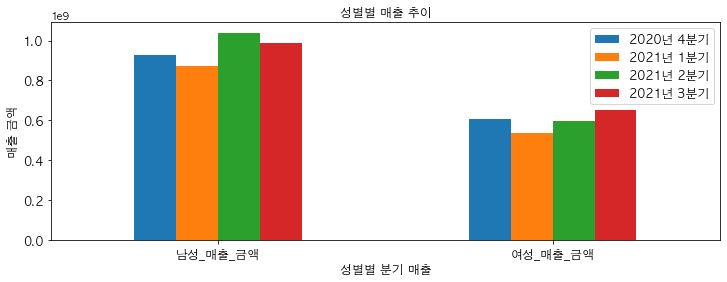

In [76]:
mpl.rc('font', family='AppleGothic')
 
# 차트 종류, 제목, 차트 크기, 범례, 폰트 크기 설정
ax = yearIncome_sex.plot(kind='bar', title='성별별 매출 추이', figsize=(12, 4), legend=True, fontsize=12)
plt.xticks(rotation=0)
ax.set_xlabel('성별별 분기 매출', fontsize=12)          # x축 정보 표시
ax.set_ylabel('매출 금액', fontsize=12)    # y축 정보 표시
ax.legend(['2020년 4분기', '2021년 1분기', '2021년 2분기', '2021년 3분기'], fontsize=12)    # 범례 지정

**연령별 매출 추이**

In [52]:
yearIncome_age = yearIncome_gu_sang[['기준_분기_코드', '연령대_10_매출_금액', '연령대_20_매출_금액', '연령대_30_매출_금액', '연령대_40_매출_금액', '연령대_50_매출_금액', '연령대_60_이상_매출_금액']] #필요한 것만 자름
yearIncome_age = yearIncome_age.set_index('기준_분기_코드') # 기준분기코드를 인덱스로 지정
yearIncome_age = yearIncome_age[::-1]                   # 3214에서 4123으로 순서 변경
yearIncome_age = yearIncome_age.transpose()             # 행렬 뒤집음
yearIncome_age

기준_분기_코드,4,1,2,3
연령대_10_매출_금액,12833536.0,6675368.0,7935580.0,9971629.0
연령대_20_매출_금액,469281243.0,345347935.0,398802583.0,439710424.0
연령대_30_매출_금액,487989161.0,461967891.0,522755815.0,492067447.0
연령대_40_매출_금액,358156996.0,362567058.0,418693932.0,409751288.0
연령대_50_매출_금액,157884386.0,172186583.0,216067393.0,208928511.0
연령대_60_이상_매출_금액,47990350.0,61781811.0,70945364.0,79809286.0


(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, '연령대_10_매출_금액'),
  Text(1, 0, '연령대_20_매출_금액'),
  Text(2, 0, '연령대_30_매출_금액'),
  Text(3, 0, '연령대_40_매출_금액'),
  Text(4, 0, '연령대_50_매출_금액'),
  Text(5, 0, '연령대_60_이상_매출_금액')])

Text(0.5, 0, '연령별 분기 매출')

Text(0, 0.5, '매출 금액')

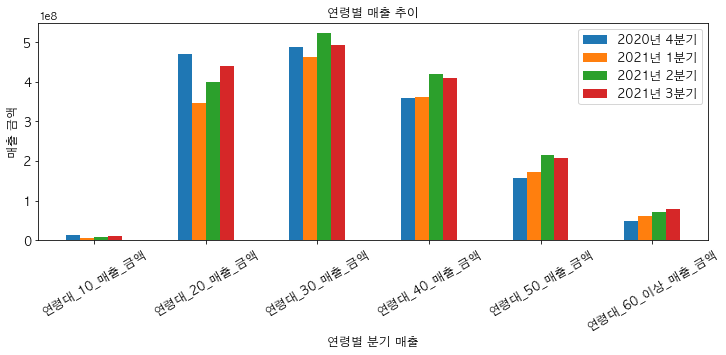

In [60]:
mpl.rc('font', family='AppleGothic')
 
# 차트 종류, 제목, 차트 크기, 범례, 폰트 크기 설정
ax = yearIncome_age.plot(kind='bar', title='연령별 매출 추이', figsize=(12, 4), legend=True, fontsize=12)
plt.xticks(rotation=30)
# plt.yticks(np.arange(0, 1000000))
ax.set_xlabel('연령별 분기 매출', fontsize=12)          # x축 정보 표시
ax.set_ylabel('매출 금액', fontsize=12)    # y축 정보 표시
ax.legend(['2020년 4분기', '2021년 1분기', '2021년 2분기', '2021년 3분기'], fontsize=12)    # 범례 지정 

**요일별 매출 추이**

In [59]:
yearIncome_day = yearIncome_gu_sang[['기준_분기_코드', '월요일_매출_금액', '화요일_매출_금액', '수요일_매출_금액', '목요일_매출_금액', '금요일_매출_금액', '토요일_매출_금액', '일요일_매출_금액']] #필요한 것만 자름
yearIncome_day = yearIncome_day.set_index('기준_분기_코드') # 기준분기코드를 인덱스로 지정
yearIncome_day = yearIncome_day[::-1]                   # 3214에서 4123으로 순서 변경
yearIncome_day = yearIncome_day.transpose()             # 행렬 뒤집음
yearIncome_day

기준_분기_코드,4,1,2,3
월요일_매출_금액,304466811.0,256473189.0,300303952.0,292674296.0
화요일_매출_금액,283573206.0,296087181.0,296804830.0,270841805.0
수요일_매출_금액,308095757.0,268564246.0,280402989.0,271061253.0
목요일_매출_금액,300151855.0,274769294.0,318764332.0,320143662.0
금요일_매출_금액,259174153.0,266147933.0,311130952.0,313467793.0
토요일_매출_금액,172132124.0,185268622.0,204984886.0,229704013.0
일요일_매출_금액,133007193.0,132895069.0,155797551.0,159565540.0


(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, '월요일_매출_금액'),
  Text(1, 0, '화요일_매출_금액'),
  Text(2, 0, '수요일_매출_금액'),
  Text(3, 0, '목요일_매출_금액'),
  Text(4, 0, '금요일_매출_금액'),
  Text(5, 0, '토요일_매출_금액'),
  Text(6, 0, '일요일_매출_금액')])

Text(0.5, 0, '요일별 분기 매출')

Text(0, 0.5, '매출 금액')

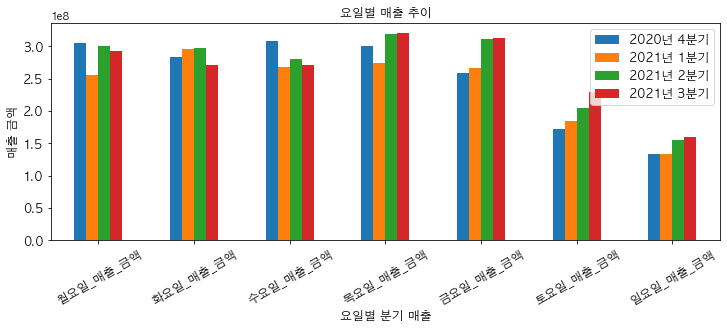

In [61]:
mpl.rc('font', family='AppleGothic')
 
# 차트 종류, 제목, 차트 크기, 범례, 폰트 크기 설정
ax = yearIncome_day.plot(kind='bar', title='요일별 매출 추이', figsize=(12, 4), legend=True, fontsize=12)
plt.xticks(rotation=30)
# plt.yticks(np.arange(0, 1000000))
ax.set_xlabel('요일별 분기 매출', fontsize=12)          # x축 정보 표시
ax.set_ylabel('매출 금액', fontsize=12)    # y축 정보 표시
ax.legend(['2020년 4분기', '2021년 1분기', '2021년 2분기', '2021년 3분기'], fontsize=12)    # 범례 지정 

**시간대별 매출 추이**

In [63]:
yearIncome_time = yearIncome_gu_sang[['기준_분기_코드', '시간대_00~06_매출_금액', '시간대_06~11_매출_금액', '시간대_11~14_매출_금액', '시간대_14~17_매출_금액', '시간대_17~21_매출_금액', '시간대_21~24_매출_금액']] #필요한 것만 자름
yearIncome_time = yearIncome_time.set_index('기준_분기_코드') # 기준분기코드를 인덱스로 지정
yearIncome_time = yearIncome_time[::-1]                   # 3214에서 4123으로 순서 변경
yearIncome_time = yearIncome_time.transpose()             # 행렬 뒤집음
yearIncome_time

기준_분기_코드,4,1,2,3
시간대_00~06_매출_금액,22470887.0,27661592.0,32887261.0,36532940.0
시간대_06~11_매출_금액,456634550.0,345298359.0,420514073.0,399415920.0
시간대_11~14_매출_금액,395812251.0,385892045.0,359189963.0,338409896.0
시간대_14~17_매출_금액,355590586.0,325724651.0,397721168.0,364679671.0
시간대_17~21_매출_금액,413095172.0,424747325.0,420988867.0,513639013.0
시간대_21~24_매출_금액,116997653.0,170881562.0,236888160.0,204780922.0


(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, '시간대_00~06_매출_금액'),
  Text(1, 0, '시간대_06~11_매출_금액'),
  Text(2, 0, '시간대_11~14_매출_금액'),
  Text(3, 0, '시간대_14~17_매출_금액'),
  Text(4, 0, '시간대_17~21_매출_금액'),
  Text(5, 0, '시간대_21~24_매출_금액')])

Text(0.5, 0, '시간별 분기 매출')

Text(0, 0.5, '매출 금액')

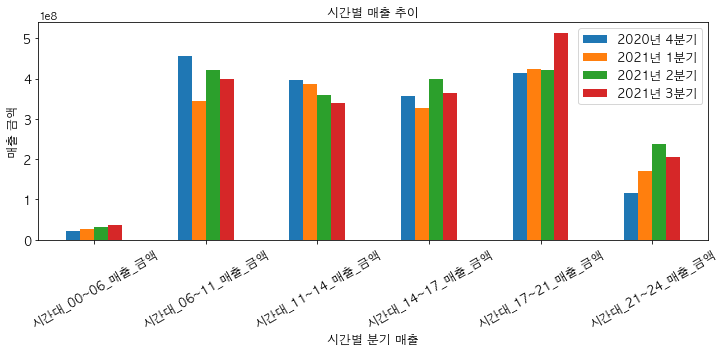

In [66]:
mpl.rc('font', family='AppleGothic')
 
# 차트 종류, 제목, 차트 크기, 범례, 폰트 크기 설정
ax = yearIncome_time.plot(kind='bar', title='시간별 매출 추이', figsize=(12, 4), legend=True, fontsize=12)
plt.xticks(rotation=30)
ax.set_xlabel('시간별 분기 매출', fontsize=12)          # x축 정보 표시
ax.set_ylabel('매출 금액', fontsize=12)    # y축 정보 표시
ax.legend(['2020년 4분기', '2021년 1분기', '2021년 2분기', '2021년 3분기'], fontsize=12)    # 범례 지정 